# The Harmonic Oscillator Strikes Back

*Note:* Much of this is adapted/copied from https://flothesof.github.io/harmonic-oscillator-three-methods-solution.html

This week we continue our adventures with the harmonic oscillator.

![1D Harmonic Oscillator](ho.png) 

The harmonic oscillator is a system that, when displaced from its equilibrium position, experiences a restoring force F proportional to the displacement x:

$$F=-kx$$

The potential energy of this system is 

$$V = {1 \over 2}k{x^2}$$

These are sometime rewritten as

$$ F=- \omega_0^2 m x, \text{ }  V(x) = {1 \over 2} m \omega_0^2 {x^2}$$

Where $\omega_0  = \sqrt {{k \over m}} $

If the equilibrium value of the harmonic oscillator is not zero, then 

$$ F=- \omega_0^2 m (x-x_{eq}), \text{ }  V(x) = {1 \over 2} m \omega_0^2 (x-x_{eq})^2$$

## 1. Harmonic oscillator from last time (with some better defined conditions)

Applying the harmonic oscillator force to Newton's second law leads to the following second order differential equation

$$ F = m a $$

$$ F= -m \omega_0^2 (x-x_{eq}) $$

$$ a = - \omega_0^2 (x-x_{eq}) $$

$$ x(t)'' = - \omega_0^2 (x-x_{eq}) $$

The final expression can be rearranged into a second order homogenous differential equation, and can be solved using the methods we used above

This is already solved to remind you how we found these values

In [1]:
import sympy as sym
sym.init_printing()

**Note** that this time we define some of the properties of the symbols. Namely, that the frequency is always positive and real and that the positions are always real

In [2]:
omega0,t=sym.symbols("omega_0,t",positive=True,nonnegative=True,real=True)
xeq=sym.symbols("x_{eq}",real=True)
x=sym.Function("x",real=True)
x(t),omega0

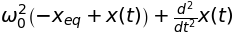

In [3]:
dfeq=sym.Derivative(x(t),t,2)+omega0**2*(x(t)-xeq)
dfeq

In [4]:
sol = sym.dsolve(dfeq)
sol

In [5]:
sol,sol.args[0],sol.args[1]

**Note** this time we define the initial positions and velocities as real

In [6]:
x0,v0=sym.symbols("x_0,v_0",real=True)
ics=[sym.Eq(sol.args[1].subs(t, 0), x0),
     sym.Eq(sol.args[1].diff(t).subs(t, 0), v0)]
ics

In [7]:
solved_ics=sym.solve(ics)
solved_ics

### 1.1 Equation of motion for $x(t)$

In [8]:
full_sol = sol.subs(solved_ics[0])
full_sol

### 1.2 Equation of motion for $p(t)$

In [9]:
m=sym.symbols("m",positive=True,nonnegative=True,real=True)
p=sym.Function("p")
sym.Eq(p(t),m*sol.args[1].subs(solved_ics[0]).diff(t))

## 2. Time average values for a harmonic oscillator

If we want to understand the average value of a time dependent observable, we need to solve the following integral


$${\left\langle {A(t)} \right\rangle}_t  = \begin{array}{*{20}{c}}
{\lim }\\
{\tau  \to 0}
\end{array}\frac{1}{\tau }\int\limits_0^\tau  {A(t)dt} $$

### 2.1 Average position ${\left\langle {x} \right\rangle}_t$ for a harmonic oscillator

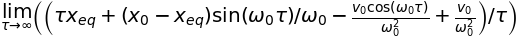

In [10]:
tau=sym.symbols("tau",nonnegative=True,real=True)
xfunc=full_sol.args[1]
xavet=(xfunc.integrate((t,0,tau))/tau).limit(tau,sym.oo)
xavet

The computer does not always make the best choices the first time. If you treat each sum individually this is not a hard limit to do by hand. The computer is not smart. We can help it by inseting an `expand()` function in the statement

In [11]:
xavet=(xfunc.integrate((t,0,tau))/tau).expand().limit(tau,sym.oo)
xavet

### 2.2 Excercise: Calculate the average momenta  ${\left\langle {p} \right\rangle}_t$ for a harmonic oscillator

In [12]:
tau=sym.symbols("tau",nonnegative=True,real=True)
p=sym.Eq(p(t),m*sol.args[1].subs(solved_ics[0]).diff(t))
pfunc=p.args[1]
pavet=(pfunc.integrate((t,0,tau))/tau).limit(tau,sym.oo)
pavet

### 2.3 Exercise: Calculate the average kinetic energy of a harmonic oscillator

In [14]:
ke=pfunc**2/2*m
ke

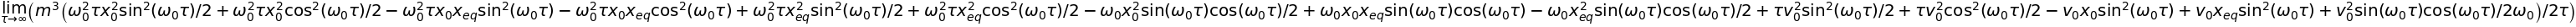

In [15]:
keavet=(ke.integrate((t,0,tau))/tau).limit(tau,sym.oo)
keavet

In [16]:
keavet=(ke.integrate((t,0,tau))/tau).expand().limit(tau,sym.oo)
keavet

## 3.  Ensemble (Thermodynamic) Average values for a harmonic oscillator

If we want to understand the thermodynamics ensemble average value of an observable, we need to solve the following integral. 


$${\left\langle {A(t)} \right\rangle}_{T}  = \frac{\int{A e^{-\beta H}dqdp}}{\int{e^{-\beta H}dqdp} } $$

You can think of this as a Temperature average instead of a time average.

Here $\beta=\frac{1}{k_B T}$ and the classical Hamiltonian, $H$ is

$$ H = \frac{p^2}{2 m} + V(q)$$

**Note** that the factors of $1/h$ found in the classical partition function cancel out when calculating average values

### 3.1 Average position ${\left\langle {x} \right\rangle}_t$ for a harmonic oscillator

For a harmonic oscillator with equilibrium value $x_{eq}$, the Hamiltonian is 
$$ H = \frac{p^2}{2 m} + \frac{1}{2} m \omega_0 (x-x_{eq})^2 $$

First we will calculate the partition function $\int{e^{-\beta H}dqdp}$

In [17]:
k,T=sym.symbols("k,T",positive=True,nonnegative=True,real=True)
xT,pT=sym.symbols("x_T,p_T",real=True)
ham=sym.Rational(1,2)*(pT)**2/m + sym.Rational(1,2)*m*omega0**2*(xT-xeq)**2
beta=1/(k*T)
bolz=sym.exp(-beta*ham)
z=sym.integrate(bolz,(xT,-sym.oo,sym.oo),(pT,-sym.oo,sym.oo))
z

Then we can calculate the numerator $\int{A e^{-\beta H}dqdp}$


In [18]:
numx=sym.integrate(xT*bolz,(xT,-sym.oo,sym.oo),(pT,-sym.oo,sym.oo))
numx

And now the average value

In [19]:
xaveT=numx/z
xaveT

### 3.2 Exercise: Calculate the average momenta  ${\left\langle {p} \right\rangle}_t$ for a harmonic oscillator

After calculating the value, explain why you think you got this number 

In [20]:
nump=sym.integrate(pT*bolz,(xT,-sym.oo,sym.oo),(pT,-sym.oo,sym.oo))
nump

In [21]:
pavg=nump/z
pavg

### 3.3 Exercise: Calculate the average kinetic energy

The answer you get here is a well known result related to the energy equipartition theorem

In [24]:
KE=pT**2/2*m
numKE=sym.integrate(KE*bolz,(xT,-sym.oo,sym.oo),(pT,-sym.oo,sym.oo))
numKE

In [25]:
KEavg=numKE/z
KEavg

# Back to the lecture

## 4. Exercise Verlet integrators

In this exercise we will write a routine to solve for the equations of motion for a hamonic oscillator.

Plot the positions and momenta (seprate plots) of the harmonic oscillator as a functions of time.

Calculaate trajectories using the following methods:
1. Exact solution
2. Simple taylor series expansion
3. Predictor-corrector method
4. Verlet algorithm
5. Leapfrog algorithm
6. Velocity Verlet algorithm

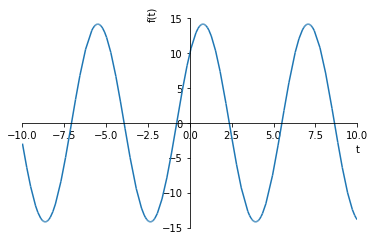

In [28]:
#Exact solution for x

fuller_sol = sym.simplify(full_sol.subs({x0:10, xeq:0 , v0:10, omega0:1}))
sym.plot(fuller_sol.rhs,(t,-10,10))

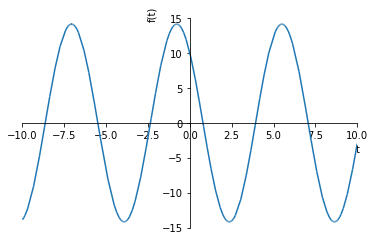

In [27]:
#Exact solution for p

m=sym.symbols("m",positive=True,nonnegative=True,real=True)
p=sym.Function("p")
sym.Eq(p(t),m*sol.args[1].subs(solved_ics[0]).diff(t))
Momenta=sym.Eq(p(t),m*sol.args[1].subs(solved_ics[0]).diff(t))
Momentaa = sym.simplify(Momenta.subs({x0:10, xeq:0 , v0:10, omega0:1, m:1}))
sym.plot(Momentaa.rhs,(t,-10,10))

Text(0, 0.5, 'y')

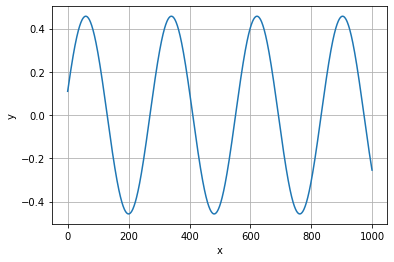

In [33]:
#Simple taylor series expansion 

import matplotlib.pyplot as plt
xt0=.1
t=.1
vt0=.1
xlist=[]
for i in range(0,1000):
    vt=vt0+(1/2)*t**2*(-(xt0))
    vt0=vt
    xt= xt0+(vt0)*(t)
    xt0=xt
    xlist.append(xt)
plt.plot(xlist)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

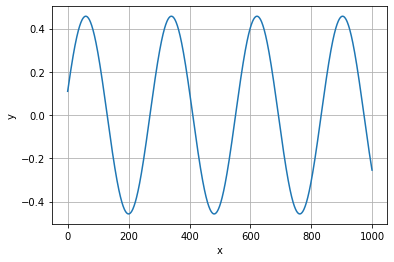

In [34]:
# Verlet algorithm for position
#r(t+dt)=2r(t)-r(t-dt)+dt**2*a
#v(t)=(r(t+dt)-r(t-dt))/2dt

xt1=.1
xt2=.1
t=.1
a=.1
plist=[]
for i in range(0,100):
    vt=(xt2-xt1)/2*t
    xt1=xt2
    xt3=vt
    plist.append(vt)
plt.plot(xlist)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

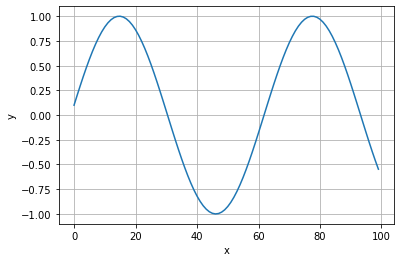

In [35]:
# Verlet algorithm for momentum
#r(t+dt)=2r(t)-r(t-dt)+dt**2*a
#v(t)=(r(t+dt)-r(t-dt))/2dt

xt1=.1
xt2=.1
t=.1
a=.1
xlist=[]
for i in range(0,100):
    xt1=2*xt2-xt3+t**2*-xt2
    xt3=xt2
    xt2=xt1
    xlist.append(xt3)
plt.plot(xlist)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

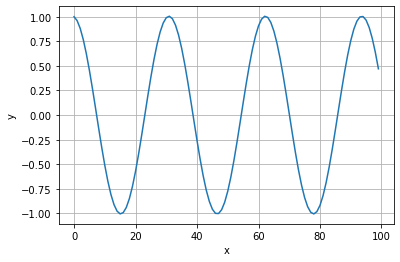

In [36]:
#Leapfrog for position
#r(t+dt)=r(t)+dtv(t+1/2dt)
#v(t+1/2dt)=v(t-1/2dt)+dta(t)
#v(t)=1/2(v(t+1/2dt)+v(t-1/2dt))
xt1=1
t=.2
xtwohalf=.2
xlist=[]
for i in range(0,100):
    xtwhalf=xtwohalf+t*-xt1
    xtwohalf=xtwhalf
    xt2=xt1+t*xtwhalf
    xt1=xt2
    xlist.append(xt2)
plt.plot(xlist)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

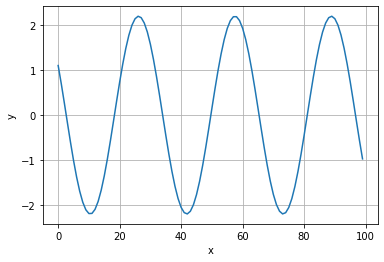

In [37]:
#Leapfrog for velocity
#r(t+dt)=r(t)+dtv(t+1/2dt)
#v(t+1/2dt)=v(t-1/2dt)+dta(t)
#v(t)=1/2(v(t+1/2dt)+v(t-1/2dt))
vt1=2
t=.2
vtwohalf=.2
vtwhalf=2
vlist=[]
for i in range(0,100):
    vt11=(1/2)*((vtwhalf)+(vtwohalf))
    vtwohalf=vt11
    vtwhalf=vtwohalf+t*-vt1
    vtwohalf=vtwhalf
    vt2=vt1+t*vtwhalf
    vt1=vt2
    vlist.append(vt11)
plt.plot(vlist)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

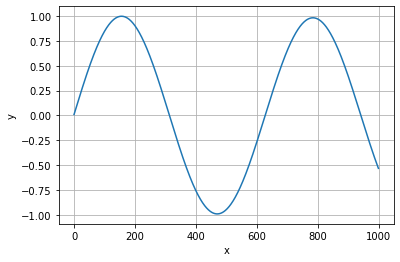

In [38]:
#velocity verlet for position
#r(t+dt)=r(t)+dtv(t)+1/2dt^2a(t)
#v(t+dt)=v(t)+1/2dt(a(t)+a(t+dt))
#v(t+1/2dt)=v(t)+1/2dta(t)
#v(t+dt)=v(t+1/2dt)+1/2dta(t+dt)

dt=0.01
x1=0
v1=1
x=[]
for i in range(0,1000):
    x2=x1+v1*dt+1/2*-x1*dt**2
    x1=x2
    v2=v1+1/2*(-x2-x1)*dt
    v1=v2
    x.append(x2)
plt.plot(x)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

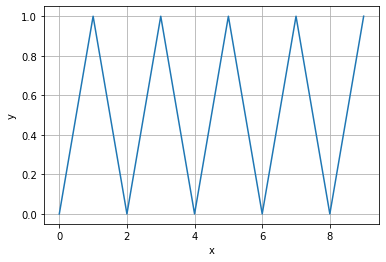

In [39]:
#velocity verlet for Velocity
#r(t+dt)=r(t)+dtv(t)+1/2dt^2a(t)
#v(t+dt)=v(t)+1/2dt(a(t)+a(t+dt))
#v(t+1/2dt)=v(t)+1/2dta(t)
#v(t+dt)=v(t+1/2dt)+1/2dta(t+dt)

xt1=1
dt=2
vt1=1
vell=[]
for i in range(0,10):
    vwhalf=vt1+1/2*dt*-xt1
    xt1=vwhalf
    vell.append(vwhalf)
plt.plot(vell)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')